# Bokeh

In [1]:
%%time
# import necessary libraries
import numpy as np
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
import pandas as pd

# load data stored in a CSV file
df = pd.read_csv("data/penguins.csv")

# Enable notebook output
output_notebook()

# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# Define color palette for species
species_palette = {'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'red'}
df['color'] = df['species'].map(species_palette)

# Create a ColumnDataSource from the DataFrame
source = ColumnDataSource(df)

# Create scatter plots and histograms
plots = []
for i, col1 in enumerate(numeric_columns):
    row_plots = []
    for j, col2 in enumerate(numeric_columns):
        if i == j:
            hist, edges = np.histogram(df[col1].dropna(), bins=20)  # Drop NaN values
            p = figure(title=f"{col1} Histogram", background_fill_color="#fafafa", width=275, height=200)
            p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white", alpha=0.5)
            p.xaxis.axis_label = col1
            p.yaxis.axis_label = 'Frequency'
        else:
            p = figure(title=f"{col1} vs {col2}", background_fill_color="#fafafa",  width=275, height=200)
            p.circle(x=col2, y=col1, color='color', legend_field='species', source=source)
            p.xaxis.axis_label = col2
            p.yaxis.axis_label = col1

            # Add hover tool
            hover = HoverTool(tooltips=[(col2, f"@{col2}"), (col1, f"@{col1}"), ("species", "@species")])
            p.add_tools(hover)
        row_plots.append(p)
    plots.append(row_plots)

# Arrange plots into a grid
grid = gridplot(plots)

# Show the plot
show(grid)

Loading BokehJS ...

CPU times: user 3.96 s, sys: 588 ms, total: 4.54 s
Wall time: 7.81 s


# Matplotlib

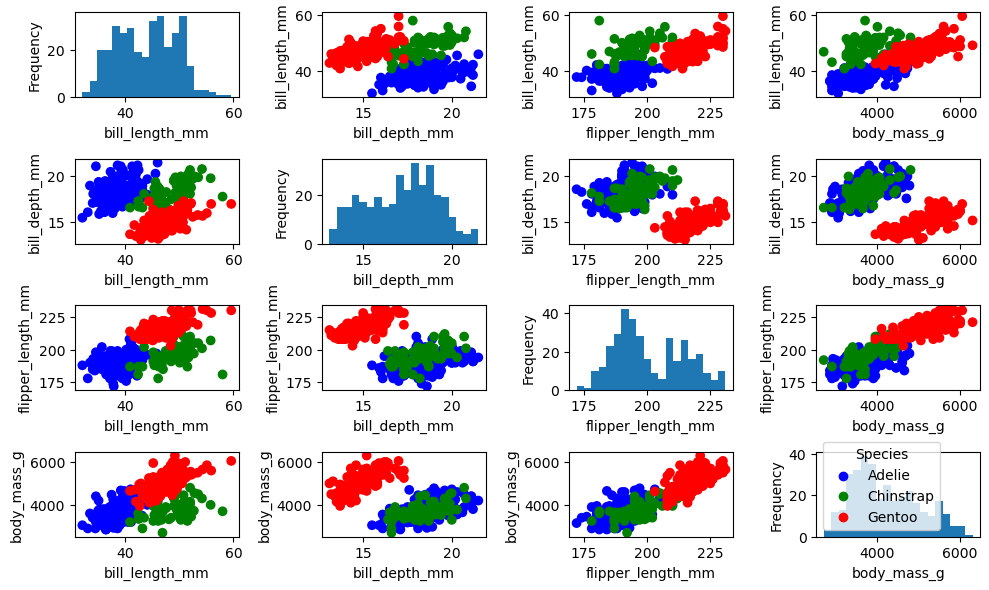

CPU times: user 2.64 s, sys: 85.2 ms, total: 2.73 s
Wall time: 3.18 s


In [7]:
%%time
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load data stored in a CSV file
df = pd.read_csv("data/penguins.csv")

# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Define color palette for species
species_palette = {'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'red'}
df['color'] = df['species'].map(species_palette)

# Set the figure size
plt.figure(figsize=(10, 6), dpi = 100)

# Create scatter plots and histograms
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        plt.subplot(len(numeric_columns), len(numeric_columns), i * len(numeric_columns) + j + 1)
        if i == j:
            plt.hist(df[col1], bins=20)  # Histogram
            plt.xlabel(col1)
            plt.ylabel('Frequency')
        else:
            plt.scatter(df[col2], df[col1], c=df['color'])  # Scatter plot
            plt.xlabel(col2)
            plt.ylabel(col1)

# Create legend
for species_name, color in species_palette.items():
    plt.scatter([], [], color=color, label=species_name)

plt.legend(title='Species')
plt.tight_layout()
plt.show()

# Plotly

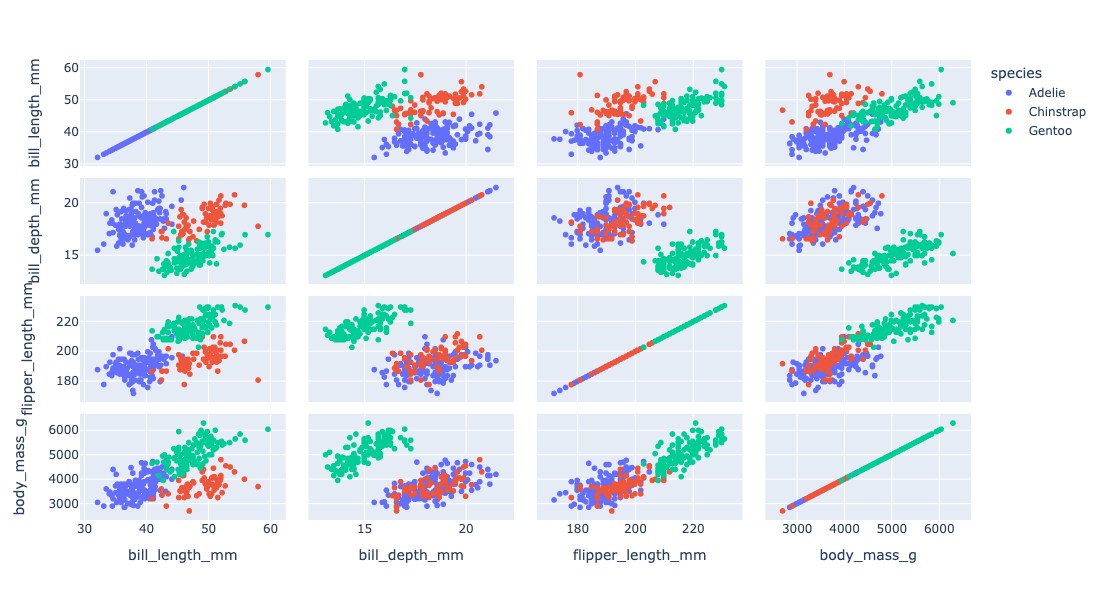

CPU times: user 988 ms, sys: 1.37 s, total: 2.36 s
Wall time: 8.94 s


In [9]:
%%time
# import necessary libraries
import pandas as pd
import plotly.express as px

# load data stored in a CSV file
df = pd.read_csv("data/penguins.csv")

# Define category orders
category_orders = {"species": ["Adelie", "Chinstrap", "Gentoo"]}

# Create an interactive scatter matrix plot with customized category order and larger size
fig = px.scatter_matrix(df, dimensions=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"], 
                        color="species", category_orders=category_orders,
                        width=1000, height=600)  # Set width and height

# Show the plot
fig.show()

# Seaborn

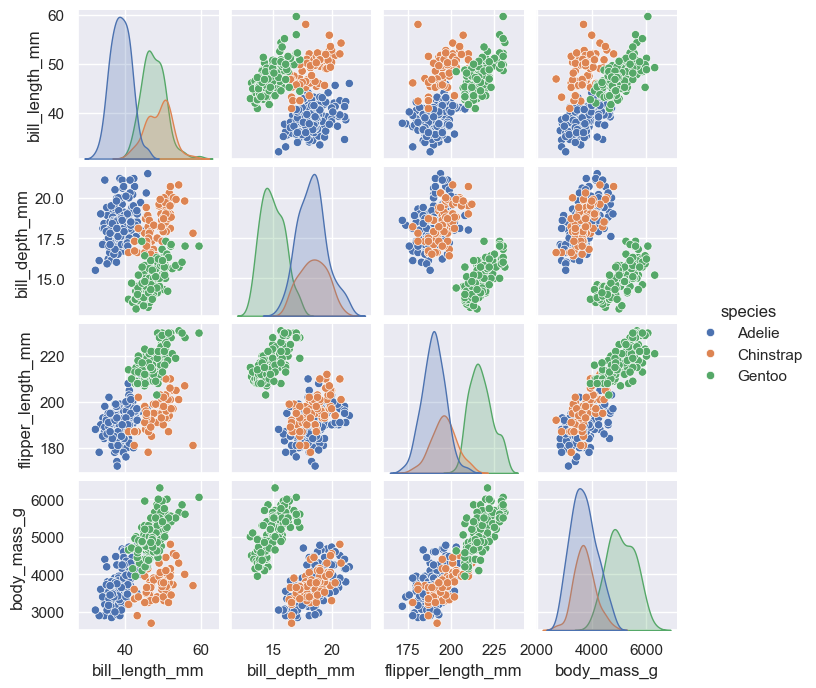

CPU times: user 9.45 s, sys: 349 ms, total: 9.8 s
Wall time: 12.1 s


In [14]:
%%time
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# set seaborn style
sns.set_theme()

df = pd.read_csv("data/penguins.csv")

sns.pairplot(df, hue = "species", height=1.75)

plt.show()

# Octave






The gnuplot graphics toolkit is not actively maintained and has a number


of limitations that are unlikely to be fixed.  Communication with gnuplot


uses a one-directional pipe and limited information is passed back to the


Octave interpreter so most changes made interactively in the plot window


will not be reflected in the graphics properties managed by Octave.  For


example, if the plot window is closed with a mouse click, Octave will not


be notified and will not update its internal list of open figure windows.


The qt toolkit is recommended instead.


    axes at line 107 column 8
    subplot at line 335 column 18

Time elapsed is 23.493656 seconds


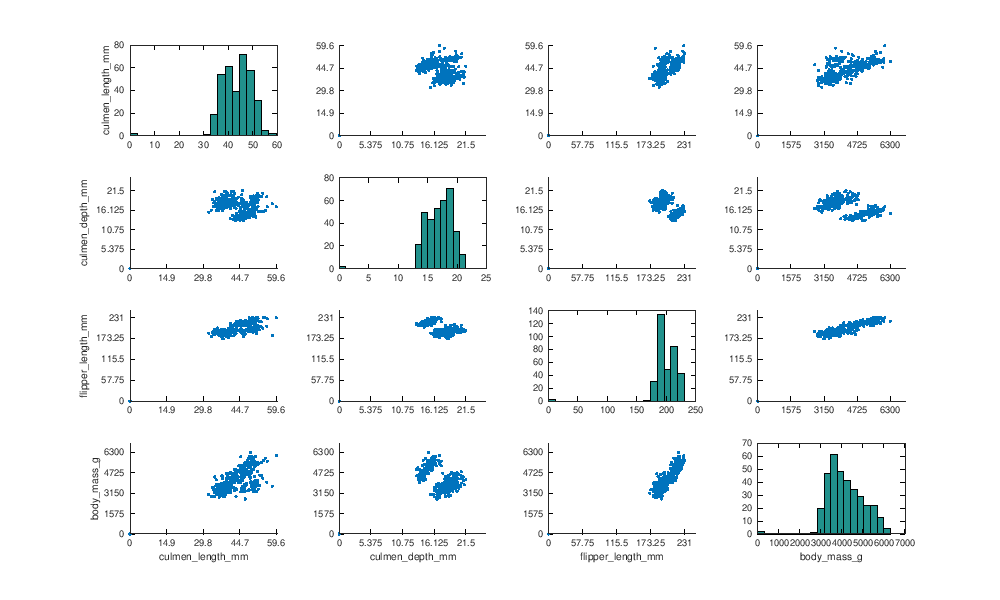

In [1]:
% Start the timer
tic;

% Switch to the gnuplot graphics toolkit
graphics_toolkit('gnuplot')

% Load the dataset
data = csvread("data/penguins.csv", 1, 0);

% Extract columns 3 to 6
numeric_data = data(:, 3:6);

% Remove rows with missing values
numeric_data = numeric_data(all(~isnan(numeric_data), 2), :);

% Column labels
column_labels = {'culmen\\_length\\_mm', 'culmen\\_depth\\_mm', 'flipper\\_length\\_mm', 'body\\_mass\\_g'};

% Get the number of variables (columns)
num_vars = size(numeric_data, 2);

% Create a new figure with a larger size
figure('Position', [0, 0, 1000, 600]);
for i = 1:num_vars
    for j = 1:num_vars
        subplot(num_vars, num_vars, (i-1)*num_vars + j);
        if i == j
            hist(numeric_data(:, i), 20); % Adjust the number of bins if needed
            set(gca, 'FontSize', 4);
        else
            scatter(numeric_data(:, j), numeric_data(:, i), '.');
            set(gca, 'FontSize', 4); % Set font size for axes
            % Reduce the number of ticks
            set(gca, 'XTick', linspace(min(numeric_data(:, j)), max(numeric_data(:, j)), 5));
            set(gca, 'YTick', linspace(min(numeric_data(:, i)), max(numeric_data(:, i)), 5));
        end
        if i == 4
            xlabel(column_labels{j}, 'FontSize', 4);  % Use column labels for x-axis with smaller font size
        else
            xlabel('');  % Empty label for other subplots
        end
        if j == 1
            ylabel(column_labels{i}, 'FontSize', 4);  % Use column labels for y-axis with smaller font size
        else
            ylabel('');  % Empty label for other subplots
        end
    end
end

% Stop the timer and display the elapsed time
elapsed_time = toc;
fprintf('Time elapsed is %f seconds\n', elapsed_time);

# ggplot2

Lade nötiges Paket: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Time difference of 5.215509 secs


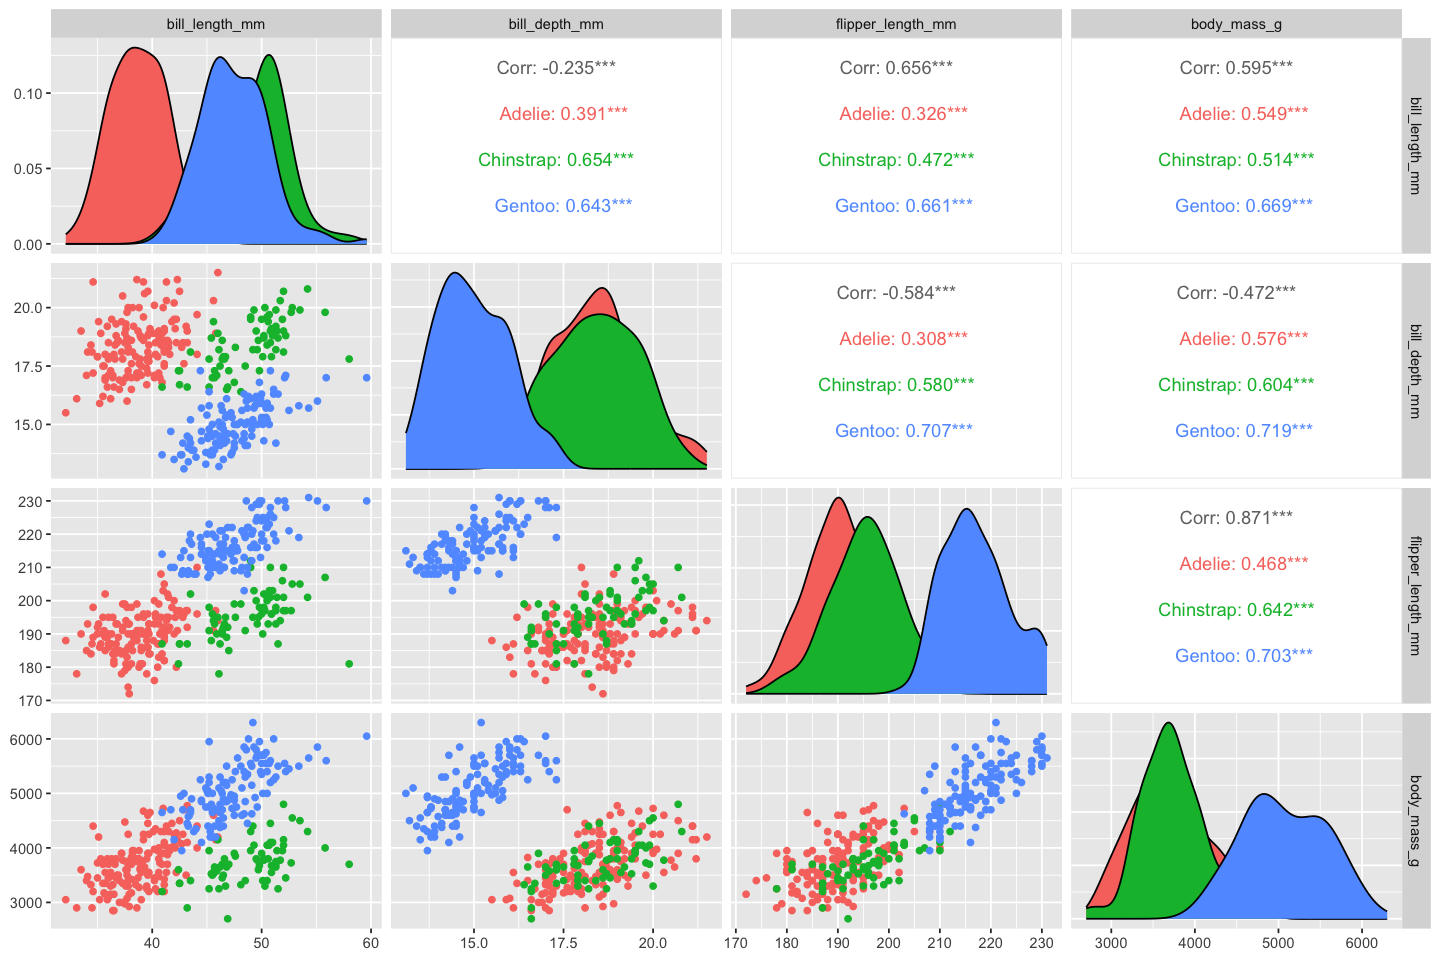

In [1]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(GGally)
library(ggplot2)

# Set the default plot size
options(repr.plot.width=12, repr.plot.height=8)

# load data stored in a CSV file
df <- read.csv("data/penguins.csv")

# Remove rows with non-finite values
df <- df[complete.cases(df), ]

# Define category orders
df$species <- factor(df$species, levels = c("Adelie", "Chinstrap", "Gentoo"))

# Create scatterplot matrix
ggpairs(df, columns = c("bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"), 
        mapping = ggplot2::aes(color = species))

end.time <- Sys.time()
print(end.time - start.time)

# Lattice

Time difference of 0.3031042 secs


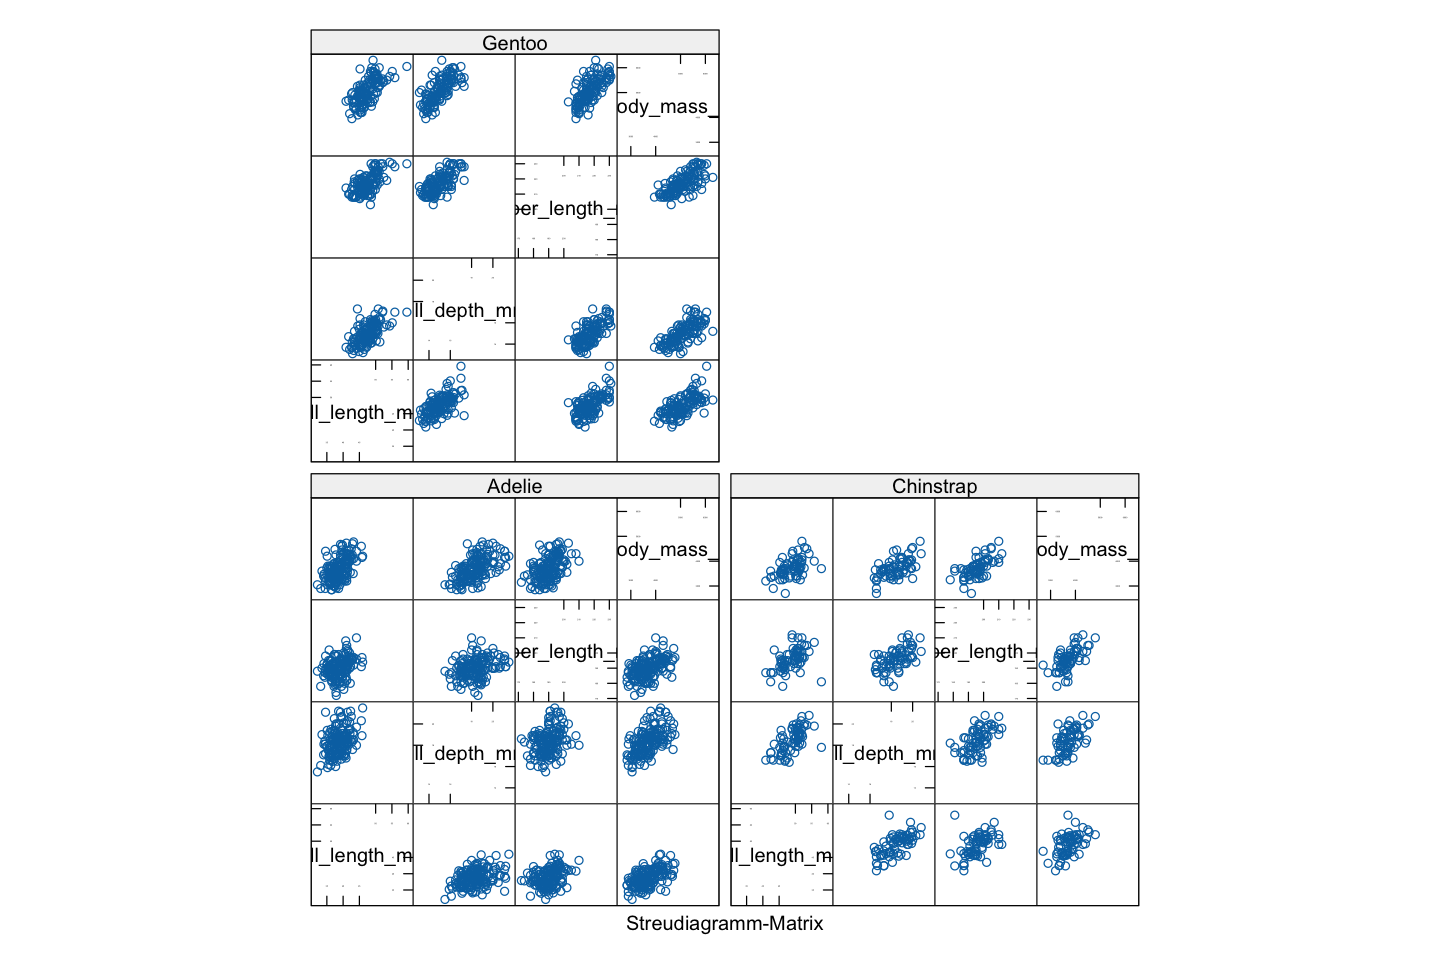

In [3]:
# Measure the execution time of a code block
start.time <- Sys.time()

# Load the necessary libraries
library(lattice)

# load data stored in a CSV file
df <- read.csv("data/penguins.csv")

# Set the default plot size
options(repr.plot.width=12, repr.plot.height=8)

# Define category orders
df$species <- factor(df$species, levels = c("Adelie", "Chinstrap", "Gentoo"))

# Set graphical parameters to make the plots bigger
trellis.par.set(theme = list(axis.text = list(cex = 0.1), strip.text = list(cex = 0.1)))

# Create scatterplot matrix
splom_obj <- splom(~df[, c("bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g")] | df$species,
      auto.key = list(columns = 3),
      scales = list(x = list(relation="free"), y = list(relation="free")))

# Print the scatterplot matrix
print(splom_obj)

end.time <- Sys.time()
print(end.time - start.time)